In [20]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os


In [21]:
# Settings
n_states = 4
N_agents = 2
n_local_actions = 3
n_joint_states = n_states ** N_agents
n_joint_actions = n_local_actions ** N_agents

# Load file
save_file_name = 'result.pkl'
save_str = os.path.abspath(os.path.join(os.path.abspath(os.path.curdir), save_file_name))

with open(save_str, 'rb') as f:
    exp_logger = pickle.load(f)

type = []
beta_vec = exp_logger['beta_vec']

if "equivocal_results" in exp_logger.keys():
    equivocal_results = exp_logger['equivocal_results']
    type.append("equivocal")
    results = equivocal_results
else:
    equivocal_results = None
    
if "targeted_results" in exp_logger.keys():
    targeted_results = exp_logger['targeted_results']
    type.append("targeted")
    results = targeted_results
else:
    targeted_results = None
    
if "diversionary_results" in exp_logger.keys():
    diversionary_results = exp_logger['diversionary_results']
    type.append("diversionary")
    results = diversionary_results
else:
    diversionary_results = None

# Deception_performance_metric with estimated rewards
def calculate_weighted_marginal_rewards(rewards, n_states, N_agents):
    shape = (n_states,)*N_agents

    r = [0] * N_agents
    
    for i in range(N_agents):
        axis = list(range(N_agents))
        axis.remove(i)

        marginal_rewards = np.apply_over_axes(np.sum, rewards.reshape(shape), axis).flatten()

        r[i] = 1*marginal_rewards[0] + 0.75*marginal_rewards[1] + 0.5*marginal_rewards[2] + 0.25*marginal_rewards[3]
        
    return r


## Marginal Rewards Plot

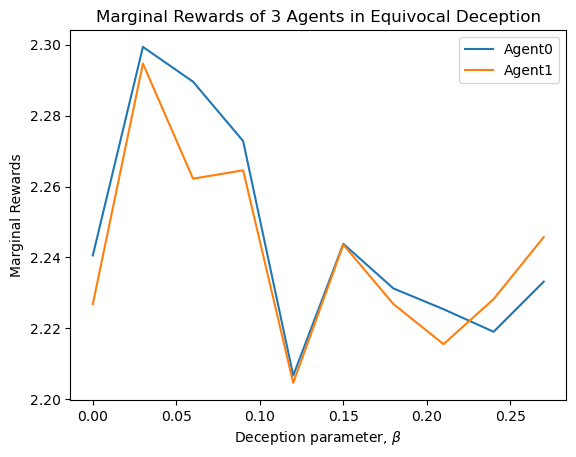

In [22]:
show = ['targeted']

true_rewards = [np.sum(results[i]['reward']['reward'].reshape(n_joint_states,n_joint_actions),axis = 1) for i in range(len(results))]

standard = calculate_weighted_marginal_rewards(true_rewards[0], n_states, N_agents)[0]

# Plot
if "diversionary" in type:
    diversionary_rewards = [np.sum(diversionary_results[i]['reward']['estimated_reward'].reshape(n_joint_states,n_joint_actions),axis = 1) for i in range(len(results))]

    for j in range(N_agents):
        s = [calculate_weighted_marginal_rewards(diversionary_rewards[i], n_states,N_agents)[j]/standard for i in range(len(results))]
        plt.plot(beta_vec, s, label='Agent' + str(j))

    
    plt.xlabel("Deception parameter, $\\beta$")
    plt.ylabel("Marginal Rewards")
    plt.legend()
    plt.title("Marginal Rewards of 3 Agents in Diversionary Deception")
    plt.savefig("Div_marginal_rewards.png")
    plt.show()
    
if "targeted" in type:
    targeted_rewards = [np.sum(targeted_results[i]['reward']['estimated_reward'].reshape(n_joint_states,n_joint_actions),axis = 1) for i in range(len(results))]

    for j in range(N_agents):
        s =[calculate_weighted_marginal_rewards(targeted_rewards[i], n_states,N_agents)[j]/standard for i in range(len(results))]
        plt.plot(beta_vec, s, label='Agent' + str(j))
    
    plt.xlabel("Deception parameter, $\\beta$")
    plt.ylabel("Marginal Rewards")
    plt.legend()
    plt.title("Marginal Rewards of 3 Agents in Targeted Deception")
    plt.savefig("Tar_marginal_rewards.png")
    plt.show()
    
if "equivocal" in type:
    equivocal_rewards = [np.sum(equivocal_results[i]['reward']['estimated_reward'].reshape(n_joint_states,n_joint_actions),axis = 1) for i in range(len(results))]

    for j in range(N_agents):
        s =[calculate_weighted_marginal_rewards(equivocal_rewards[i], n_states,N_agents)[j]/standard for i in range(len(results))]
        plt.plot(beta_vec, s, label='Agent' + str(j))

    plt.xlabel("Deception parameter, $\\beta$")
    plt.ylabel("Marginal Rewards")
    plt.legend()
    plt.title("Marginal Rewards of 3 Agents in Equivocal Deception")
    plt.savefig("Equ_marginal_rewards.png")
    plt.show()

## Revenue Plot(%)

* Optimal_revenue: 100.0 (%)
* Equivocal_revenue: 99.99910815239737 (%)


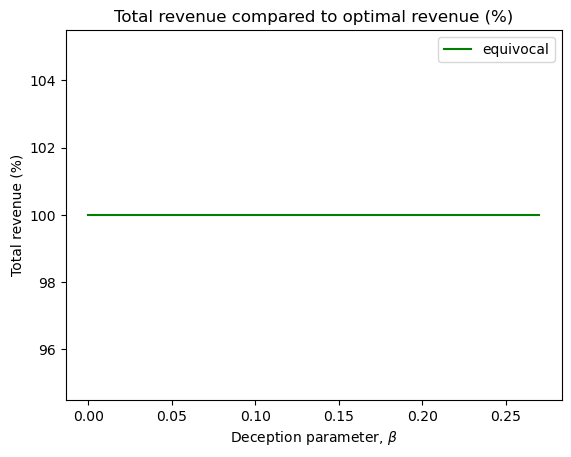

In [23]:
# Plot the revenue
standard = results[0]['revenue']['revenue']
optimal_revenue = [results[i]['revenue']['revenue'] for i in range(len(results))]/standard*100

print("* Optimal_revenue:", optimal_revenue[-1] , "(%)")

if "diversionary" in type:
    diversionary_revenue = [diversionary_results[i]['revenue']['deceptive_revenue'] for i in range(len(results))]/standard*100
    plt.plot(beta_vec, diversionary_revenue, label='diversionary', c = 'r')
    print("* Diversionary_revenue:", diversionary_revenue[-1], "(%)")
    
if "targeted" in type:
    targeted_revenue = [targeted_results[i]['revenue']['deceptive_revenue'] for i in range(len(results))]/standard*100
    plt.plot(beta_vec, targeted_revenue, label='targeted', c = 'b')
    print("* Targeted_revenue:", targeted_revenue[-1], "(%)")
    
if "equivocal" in type:
    equivocal_revenue = [equivocal_results[i]['revenue']['deceptive_revenue'] for i in range(len(results))]/standard*100
    plt.plot(beta_vec, equivocal_revenue, label='equivocal', c = 'g')
    print("* Equivocal_revenue:", equivocal_revenue[-1], "(%)")
        
plt.xlabel("Deception parameter, $\\beta$")
plt.ylabel('Total revenue (%)')
plt.legend()
plt.title("Total revenue compared to optimal revenue (%)")
plt.show()


## Revenue Plot with Bounds(%)

In [24]:
gamma = 0.9
space_size = n_joint_states * n_joint_actions
R_star = results[0]['revenue']['revenue']

x_star = results[0]['occupancy_measure']['occupancy_measure']
x_star_square_sum = np.sum([x**2 for x in x_star.flatten()])

x_tar = results[0]['occupancy_measure']['target_occupancy_measure']
max_x_tar = np.max(x_tar)
min_x_tar = np.min(x_tar)

diversionary_bound_coefficient = (x_star_square_sum + (1-gamma)**(-2))/R_star
targeted_bound_coefficient = ((1-1/space_size)*((1-gamma)**(-2))+2*(max_x_tar - min_x_tar)/(1-gamma))/R_star

print(diversionary_bound_coefficient)
print(targeted_bound_coefficient)


1.284418679575195
2.1105755426183324


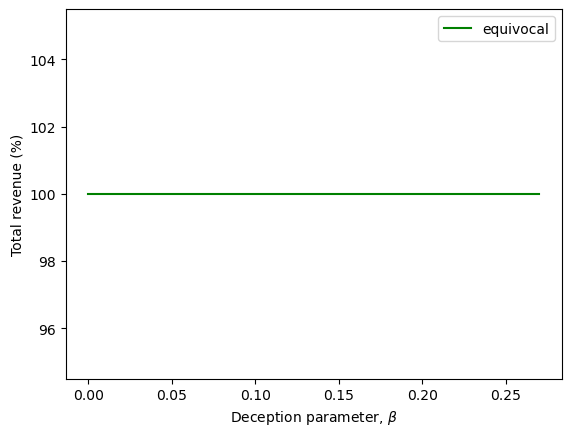

In [25]:

# Plot the revenue
standard = results[0]['revenue']['revenue']
optimal_revenue = [results[i]['revenue']['revenue'] for i in range(len(results))]/standard*100

if "diversionary" in type:
    diversionary_revenue = [diversionary_results[i]['revenue']['deceptive_revenue'] for i in range(len(results))]/standard*100
    plt.plot(beta_vec, diversionary_revenue, label='Revenue', c = 'r')
    plt.plot(beta_vec, 100*np.ones(beta_vec.shape), '--', label='Optimal revenue', c = 'gray')
    plt.plot(beta_vec, 100*(np.ones(beta_vec.shape)-diversionary_bound_coefficient*beta_vec), ':', label='Revenue bound', c = 'gray')
    plt.fill_between(beta_vec, 100*(np.ones(beta_vec.shape)-diversionary_bound_coefficient*beta_vec), 100, 
                     where=100 >= 100*(np.ones(beta_vec.shape)-diversionary_bound_coefficient*beta_vec), 
                      color='C1', alpha=0.2, interpolate=True)
    plt.title("Total Revenue in Diversionary Deception")
    plt.xlabel("Deception parameter, $\\beta$")
    plt.ylabel('Total revenue (%)')
    plt.legend()
    plt.savefig("Div_3agent_revenue.png")
    
if "targeted" in type:
    targeted_revenue = [targeted_results[i]['revenue']['deceptive_revenue'] for i in range(len(results))]/standard*100
    plt.plot(beta_vec, targeted_revenue, label='Revenue', c = 'b')
    plt.plot(beta_vec, 100*np.ones(beta_vec.shape), '--', label='Optimal revenue', c = 'gray')
    plt.plot(beta_vec, 100*(np.ones(beta_vec.shape)-targeted_bound_coefficient*beta_vec), ':', label='Revenue bound', c = 'gray')
    plt.fill_between(beta_vec, 100*(np.ones(beta_vec.shape)-targeted_bound_coefficient*beta_vec), 100, 
                     where=100 >= 100*(np.ones(beta_vec.shape)-targeted_bound_coefficient*beta_vec), 
                      color='C0', alpha=0.2, interpolate=True)
    
    plt.title("Total Revenue in Targeted Deception")
    plt.xlabel("Deception parameter, $\\beta$")
    plt.ylabel('Total revenue (%)')
    plt.legend()
    plt.savefig("Tar_3agent_12_revenue.png")

if "equivocal" in type:
    equivocal_revenue = [equivocal_results[i]['revenue']['deceptive_revenue'] for i in range(len(results))]/standard*100
    plt.plot(beta_vec, equivocal_revenue, label='equivocal', c = 'g')

plt.xlabel("Deception parameter, $\\beta$")
plt.ylabel('Total revenue (%)')
plt.legend()
plt.show()